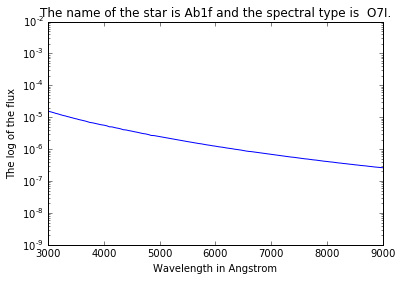

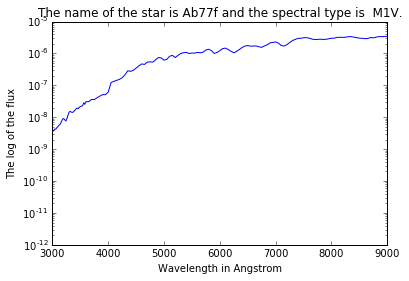

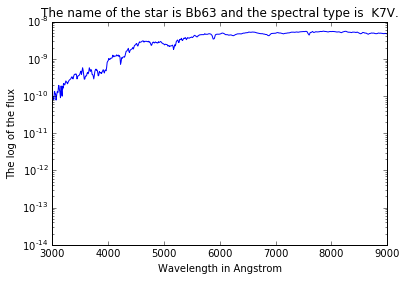

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sp
from astropy.io import fits
%matplotlib inline

def read(name):
    #reads csv file
    return(pd.read_table(name,sep = ','))

def calculating(name1, name2, name3):
    #function that reads in csv file, then looks what its spectra type is, then plots the flux against the wavelength.
    wavelength_and_flux = read(name1)
    spectra = read("Data/spectra.list.csv")
    
    # Series are directly iterable (like a list)
    j = 0
    for i in spectra['#filename']:
        j = j + 1
        if(i == name2):
            type_name = spectra[' type'][j]
       
    #genormaliseerd flux
    #wavelength_and_flux[' flux'] = wavelength_and_flux[' flux']/wavelength_and_flux.sum(axis = 1)

    plot("The name of the star is " + name3 + " and the spectral type is " + type_name + ".", wavelength_and_flux['# wavelength'], wavelength_and_flux[' flux'])

def plot(title, x, y):
    #function to plot
    plt.plot(x, y)
    plt.yscale("log")
    plt.ylabel("The log of the flux")
    plt.xlabel("Wavelength in Angstrom")
    plt.xlim(3000,9000)
    plt.title(title)
    plt.show()

#Question 1
calculating("Data/Ab1f.dat.fix", "Ab1f.dat.fix", "Ab1f")

calculating("Data/Ab77f.dat.fix", "Ab77f.dat.fix", "Ab77f")

calculating("Data/Bb63.dat.fix", "Bb63.dat.fix", "Bb63")


In [2]:
'''
import seaborn as sns
import mpld3
from bokeh.models import Title
from bokeh.plotting import figure, output_file, show, output_notebook
output_notebook()
mpld3.enable_notebook()

def plotbokeh(title, x, y):#plots file with bokeh
    #Plotting with Bokeh(trying it out)
    p = figure(title=title, y_axis_type="log", x_range=(3000, 9000), y_range=(10**-14, 10**-2))
    p.line(x=x, y=y)
    p.add_layout(Title(text="The log of the flux", align="center"), "left")
    p.add_layout(Title(text="Wavelength in Angstrom", align="center"), "below")
    p.grid.grid_line_color = None
    show(p, notebook_handle=True)
    
a, b, c = calculating("Ab1f.dat.fix")
plotbokeh(a, b, c)

a, b, c = calculating("Ab77f.dat.fix")
plotbokeh(a, b, c)

a, b, c = calculating("Bb63.dat.fix")
plotbokeh(a, b, c)
'''

'\nimport seaborn as sns\nimport mpld3\nfrom bokeh.models import Title\nfrom bokeh.plotting import figure, output_file, show, output_notebook\noutput_notebook()\nmpld3.enable_notebook()\n\ndef plotbokeh(title, x, y):#plots file with bokeh\n    #Plotting with Bokeh(trying it out)\n    p = figure(title=title, y_axis_type="log", x_range=(3000, 9000), y_range=(10**-14, 10**-2))\n    p.line(x=x, y=y)\n    p.add_layout(Title(text="The log of the flux", align="center"), "left")\n    p.add_layout(Title(text="Wavelength in Angstrom", align="center"), "below")\n    p.grid.grid_line_color = None\n    show(p, notebook_handle=True)\n    \na, b, c = calculating("Ab1f.dat.fix")\nplotbokeh(a, b, c)\n\na, b, c = calculating("Ab77f.dat.fix")\nplotbokeh(a, b, c)\n\na, b, c = calculating("Bb63.dat.fix")\nplotbokeh(a, b, c)\n'

2.
a)An Angstrom($\si{\angstrom}$) is 10$^{-10}$ m.
b)The unit of flux density is in SI units W/m$^2$ and another unit can be the Jansky.
c)

In [3]:
#Question 3 a
iets = read('Data/vega.fnu.csv')
iets['#wavelength'] = iets['#wavelength'] * 10
wavelength = iets['#wavelength']

iets.flux = iets.flux*3e18/(wavelength**2)
Flux = iets.flux
name_filter = ["U", "B", "V"]
lambd_0 = [3659, 4582, 5448]
lambd_delta = [660, 940, 880]
l = []

for i in range(3):
    lamnieuw = np.linspace(lambd_0[i]-lambd_delta[i]/2,lambd_0[i]+lambd_delta[i]/2, 100)
    Fnieuw = np.interp(lamnieuw, wavelength, Flux)
    Cx = 2.5 * np.log10(np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw))
    Mag = -2.5 * np.log10( np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw) ) + Cx
    l.append(Cx)
print(l)

[-20.906037214965792, -20.600456877808334, -21.10453294444136]


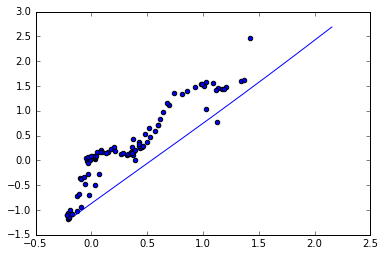

In [4]:
#Question 3 a and b
def m_x(lambd_0,lambd_delta,C_x,iets1):
    lamnieuw = np.linspace(lambd_0-lambd_delta/2,lambd_0+lambd_delta/2, 100)
    Fnieuw = np.interp(lamnieuw, iets1['# wavelength'], iets1[' flux'] )
    return(-2.5 * np.log10( np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw) ) + C_x)

def planck(lambd_0, lambd_delta, T):
    h = 6.626e-34
    c = 3.00e18
    k_B = 1.38e-23
    lamnieuw = np.linspace(lambd_0-lambd_delta/2,lambd_0+lambd_delta/2, 100)
    return((2*h*(c**2)/(lamnieuw**5))*(1/(np.exp((h*c)/(lamnieuw*k_B*T))-1)))

def m_x1(lambd_0,lambd_delta,C_x,iets1,Fnieuw):
    lamnieuw = np.linspace(lambd_0-lambd_delta/2,lambd_0+lambd_delta/2, 100)
    return(-2.5 * np.log10( np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw) ) + C_x)

T = np.arange(2000, 30100, 100)

spectra = read("Data/spectra.list.csv")

j = 0

B_V = []
U_B = []

for i in spectra['#filename']:
    i = "Data/" + i
    iets1 = read(i)
    
    type_name = spectra[' type'][j]

    U = m_x(lambd_0[0],lambd_delta[0],l[0],iets1)
    B = m_x(lambd_0[1],lambd_delta[1],l[1],iets1)
    V = m_x(lambd_0[2],lambd_delta[2],l[2],iets1) 
    B_V.append(B-V)
    U_B.append(U-B)
    
    #print("For filter ", name_filter[0],",and the star", i, ", the magnitude is",m_x(lambd_0[0],lambd_delta[0],l[0],iets1))
    #print("For filter ", name_filter[1],",and the star", i, ", the magnitude is",m_x(lambd_0[1],lambd_delta[1],l[1],iets1))
    #print("For filter ", name_filter[2],",and the star", i, ", the magnitude is",m_x(lambd_0[2],lambd_delta[2],l[2],iets1))
    plt.scatter(m_x(lambd_0[1],lambd_delta[1],l[1],iets1)-m_x(lambd_0[2],lambd_delta[2],l[2],iets1), m_x(lambd_0[0],lambd_delta[0],l[0],iets1)-m_x(lambd_0[1],lambd_delta[1],l[1],iets1))
     
B_V = np.asarray(B_V)
U_B = np.asarray(U_B)
    
B_VT = []
U_BT = []

#print(m_x1(lambd_0[0],lambd_delta[0],l[0],iets1, planck(lambd_0[0],lambd_delta[0], T[260])))


for i in range(len(T)):
    UT = m_x1(lambd_0[0],lambd_delta[0],l[0],iets1, planck(lambd_0[0],lambd_delta[0], T[i]))
    BT = m_x1(lambd_0[1],lambd_delta[1],l[1],iets1, planck(lambd_0[1],lambd_delta[1], T[i]))
    VT = m_x1(lambd_0[2],lambd_delta[2],l[2],iets1, planck(lambd_0[2],lambd_delta[2], T[i]))
    
    B_VT.append(BT - VT)
    U_BT.append(UT - BT)
    
B_VT = np.asarray(B_VT)
U_BT = np.asarray(U_BT)

plt.plot(B_VT, U_BT)

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


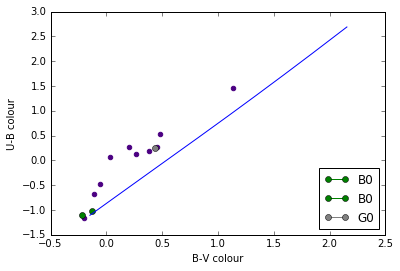

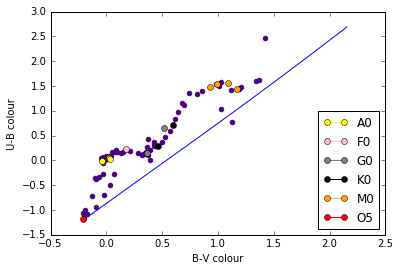

In [5]:
#Plots 3 b
j = 0
r, s, t, u = 0, 0, 0, 0
for i in spectra['#filename']:
    i = "Data/" + i
    iets1 = read(i)
    
    type_name = spectra[' type'][j]
    
    if "I" in type_name:
        if(type_name == " B0I"):
            plt.plot(B_V[j], U_B[j], color='green', label="B0", marker = "o")
            plt.plot(B_VT, U_BT)

        elif(type_name == " G0I"):
            plt.plot(B_V[j], U_B[j],color='grey', label="G0", marker = "o")

        elif(type_name == " F0I"):
            plt.plot(B_V[j], U_B[j],color='pink', label="F0", marker = "o")

        else:
            plt.scatter(B_V[j], U_B[j], color = ['indigo'])
        plt.figure(0)
        plt.legend(loc = 4)
    else:
        if(type_name == " O5V"):
            plt.plot(B_V[j], U_B[j],color='red', label="O5", marker = "o")

        elif(type_name == " B0V"):
            plt.plot(B_V[j], U_B[j],color='green', label="B0", marker = "o")

        elif(type_name == " A0V"):
            if(r == 0):
                plt.plot(B_V[j], U_B[j],color='yellow', label="A0", marker = "o")

                r = r + 1
            else:
                plt.plot(B_V[j], U_B[j],color='yellow', marker = "o")

        elif(type_name == " G0V"):
            if(s == 0):
                plt.plot(B_V[j], U_B[j],color='grey', label="G0", marker = "o")

                s = s + 1
            else:
                plt.plot(B_V[j], U_B[j],color='grey', marker = "o")

        elif(type_name == " K0V"):
            if(t == 0):
                plt.plot(B_V[j], U_B[j],color='black', label="K0", marker = "o")
                plt.plot(B_VT, U_BT)
                plt.legend(loc = 4)
                t = t + 1
            else:
                plt.plot(B_V[j], U_B[j],color='black', marker = "o")
         
        elif(type_name == " M0V"):
            if(u == 0):
                plt.plot(B_V[j], U_B[j],color='orange', label="M0", marker = "o")

                u = u + 1                
            else:
                plt.plot(B_V[j], U_B[j],color='orange', marker = "o")
              
        else:
            plt.scatter(B_V[j], U_B[j], color = ['indigo'])
        plt.figure(1)
        plt.legend(loc = 4)
    
    j = j + 1
    plt.xlabel("B-V colour")
    plt.ylabel("U-B colour")
#plt.plot(B_VT, U_BT)
#plt.legend(loc = 4)
#plt.figure(0)
#plt.show()
#plt.plot(B_VT, U_BT)
#plt.legend(loc = 4)
#plt.figure(1)
#plt.show()

#print(len(T))
#print("B0",T[260])
#print("A0",T[80])
#print("G0",T[43])
#print("F0",T[55])
#plt.scatter(B_VT[55], U_BT[55], s=10)
#plt.figure(0)

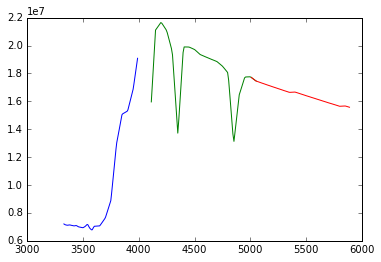

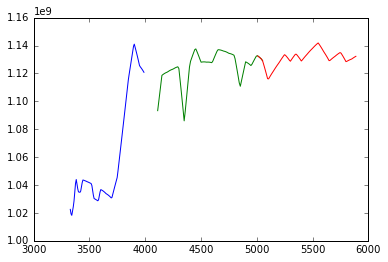

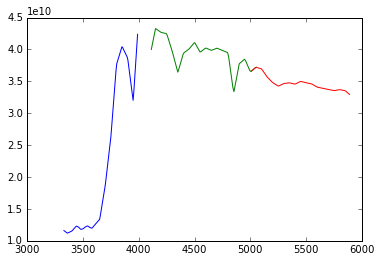

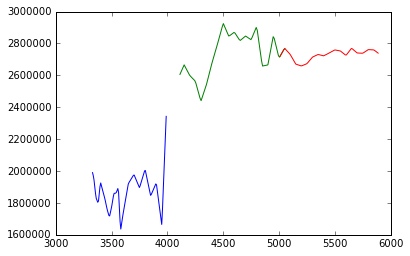

In [6]:
#Question 4
def spectra4(k, lambd_0, lambd_delta):
    y = planck(lambd_0,lambd_delta, T[k])
    lamnieuw = np.linspace(lambd_0-lambd_delta/2,lambd_0+lambd_delta/2, 100)
    Fnieuw = np.interp(lamnieuw, iets1['# wavelength'], iets1[' flux'])
    return(Fnieuw/y, lamnieuw)

def planck2(lamnieuw, T):
    h = 6.626e-34
    c = 3.00e18
    k_B = 1.38e-23
    return((2*h*(c**2)/(lamnieuw*5))*(1/(np.exp((h*c)/(lamnieuw*k_B*T))-1))) 
    
def fullspectra(k, read1, read2):
    y = planck2(read1, T[k])
    lamnieuw = read1
    Fnieuw = read2
    return(Fnieuw/y, lamnieuw)

t = 0
s = 0
r = 0
j = 0

for i in spectra['#filename']:
    i = "Data/" + i
    iets1 = read(i)
    
    type_name = spectra[' type'][j]
    
    if(type_name == " B0I"):
        USpec, Ulam = spectra4(260, lambd_0[0], lambd_delta[0])
        BSpec, Blam = spectra4(260, lambd_0[1], lambd_delta[1])
        VSpec, Vlam = spectra4(260, lambd_0[2], lambd_delta[2])
        plt.plot(Ulam, USpec)
        plt.plot(Blam, BSpec)
        plt.plot(Vlam, VSpec)
        y, x = fullspectra(260, iets1['# wavelength'], iets1[' flux'])
        #plt.plot(x, y)
        plt.show()
    elif((type_name == " A0V") and (r == 0)):
        USpec, Ulam = spectra4(80, lambd_0[0], lambd_delta[0])
        BSpec, Blam = spectra4(80, lambd_0[1], lambd_delta[1])
        VSpec, Vlam = spectra4(80, lambd_0[2], lambd_delta[2])
        plt.plot(Ulam, USpec)
        plt.plot(Blam, BSpec)
        plt.plot(Vlam, VSpec)
        y, x = fullspectra(80, iets1['# wavelength'], iets1[' flux'])
        #plt.plot(x, y)        
        plt.show()
        r = r + 1
    elif((type_name == " F0I") and (s == 0)) :
        USpec, Ulam = spectra4(55, lambd_0[0], lambd_delta[0])
        BSpec, Blam = spectra4(55, lambd_0[1], lambd_delta[1])
        VSpec, Vlam = spectra4(55, lambd_0[2], lambd_delta[2])
        plt.plot(Ulam, USpec)
        plt.plot(Blam, BSpec)
        plt.plot(Vlam, VSpec)
        y, x = fullspectra(55, iets1['# wavelength'], iets1[' flux'])
        #plt.plot(x, y)        
        plt.show()        
        s = s + 1
    elif((type_name == " G0V") and (t == 0)):
        USpec, Ulam = spectra4(43, lambd_0[0], lambd_delta[0])
        BSpec, Blam = spectra4(43, lambd_0[1], lambd_delta[1])
        VSpec, Vlam = spectra4(43, lambd_0[2], lambd_delta[2])
        plt.plot(Ulam, USpec)
        plt.plot(Blam, BSpec)
        plt.plot(Vlam, VSpec)
        y, x = fullspectra(43, iets1['# wavelength'], iets1[' flux'])
        #plt.plot(x, y)        
        plt.show()        
        t = t + 1
    
    j = j + 1

In [13]:
#Question 5

imageB = fits.getdata('Data/exposure_B.fits')
imageV = fits.getdata('Data/exposure_V.fits')

[x1, y1, flux1, sharpness1, roundness1] = sp.find(imageB, 53.1196*4, 5.)
[x2, y2, flux2, sharpness2, roundness2] = sp.find(imageV, 50.9229*4, 5.)

skyradB = [5,5,6,5,3]
skyradV = [3,5,5,5,3]

for i in range(5):
    print("Voor de ",i+1," ster (expose B) is de magnitude",sp.aper(imageB, x1[i], y1[i], 5, 5, skyrad = [3*skyradB[i], 5*skyradB[i]], badpix = [0, 0], readnoise = 250, flux= True))
    print("Voor de ",i+1," ster (expose B) is de magnitude",sp.aper(imageV, x2[i], y2[i], 5, 5, skyrad = [3*skyradV[i], 5*skyradV[i]], badpix = [0, 0], readnoise = 250))

IndexError: too many indices for array

In [ ]:
#Question 6

def SN(N_s, k, N_sk):
    g = 5
    RON = 250
    return((g * N_s)/np.sqrt(g*N_s + k*(g*N_sk + RON**2)))